# Predicting Heart Disease Using Machine Learning.

we're going to take following approch:

1. Problem defination
2. Data
3. Evaluation
4. Featuring
5. Modeling
6. Experimentation.

## 1. Problem Defination:

In a statement,
> Given the Hospital parameter about Patient, can we predict weather patient has Heart Disease or Not.

## 2 Data

> The Origanal data came from  Kaggle: https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation

> If we can reach 95% or accuracy at predicting weather patient has Heart Disease or Not.

## 4 Features

* Attribute Information
* age : age in years
* sex : (1 = male; 0 = female)
* cp : chest pain type
* trestbps : resting blood pressure (in mm Hg on admission to the hospital)
* chol : serum cholestoral in mg/dl
* fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg : resting electrocardiographic results
* thalach : maximum heart rate achieved
* exang : exercise induced angina (1 = yes; 0 = no)
* oldpeak : ST depression induced by exercise relative to rest
* slope : the slope of the peak exercise ST segment
* ca : number of major vessels (0–3) colored by flourosopy
* thal : 1 = normal; 2 = fixed defect; 3 = reversable defect
* target : 1 = disease; 0 = no disease

In [2]:
#Importing Required Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

plt.style.use('seaborn')

# Data Collection

In [3]:
#Loading data into dataframe.
df = pd.read_csv("heart.csv")

#Having a look at data.
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#Having look at the shape of data.
df.shape

(303, 14)

In [5]:
#Having look at the type of data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
#Having look at the aggregation on numeric data.
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
#Having a look at missing values.
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

* As we can see, we don't have any kind of missing values inside our dataset.

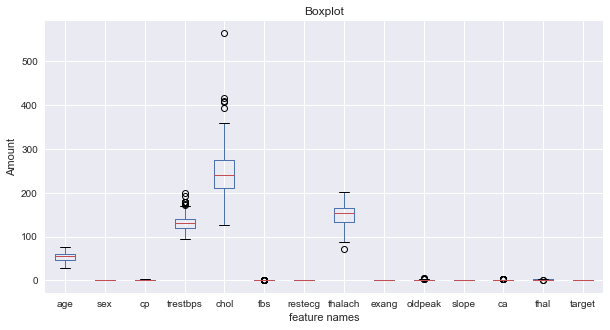

In [7]:
#Having a look at outlier.
plt.figure(figsize = (10,5))
df.boxplot()
plt.title("Boxplot")
plt.xlabel("feature names")
plt.ylabel("Amount");

* As we can see, we have some outliers inside our dataset.

# Data Interpretaion and Representation

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
#Having a look at number of positive and negative target variable.
target_value_count = df["target"].value_counts()
target_value_count

1    165
0    138
Name: target, dtype: int64

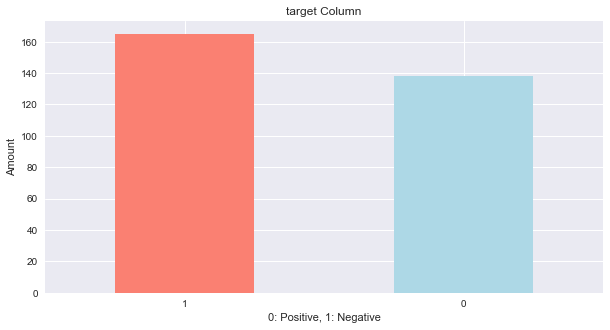

In [10]:
#Visualization
target_value_count.plot(kind = "bar",figsize = (10,5), color = ["salmon","lightblue"])
plt.title("target Column")
plt.xlabel("0: Positive, 1: Negative")
plt.ylabel("Amount")
plt.xticks(rotation = 0);

* Here we can see, we have more amount negative target as compare to positive target.

In [11]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
#Having look at the relation between target and sex columns. 
crosstab = pd.crosstab(df["target"],df["sex"])
crosstab

sex,0,1
target,,
0,24,114
1,72,93


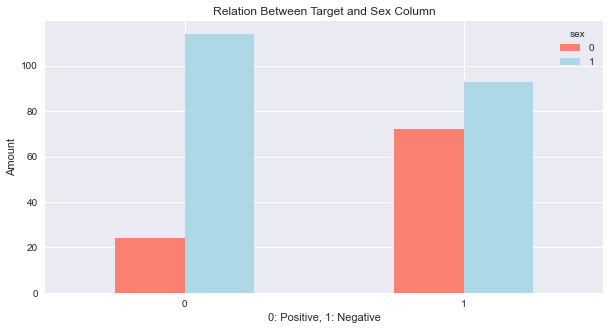

In [13]:
#Visualization
crosstab.plot(kind = "bar",figsize = (10,5), color = ["salmon","lightblue"])
plt.title("Relation Between Target and Sex Column")
plt.xlabel("0: Positive, 1: Negative")
plt.ylabel("Amount")
plt.xticks(rotation = 0);

* As we can see, we have more amount to positive cases in females as compare to males.

In [14]:
#Having look at the relation between target and sex columns. 
crosstab = pd.crosstab(df["target"],df["cp"])
crosstab

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


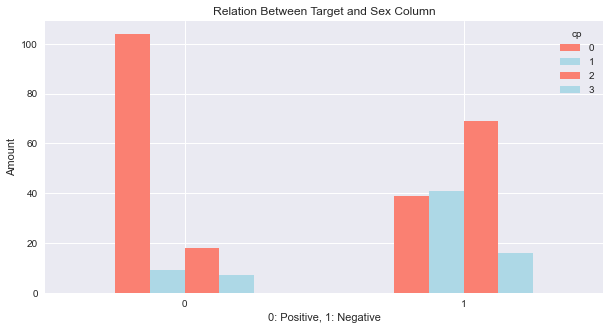

In [15]:
#Visualization
crosstab.plot(kind = "bar",figsize = (10,5), color = ["salmon","lightblue"])
plt.title("Relation Between Target and Sex Column")
plt.xlabel("0: Positive, 1: Negative")
plt.ylabel("Amount")
plt.xticks(rotation = 0);

* As we can see, the people who have the higher cp are detected positive for heart disease.

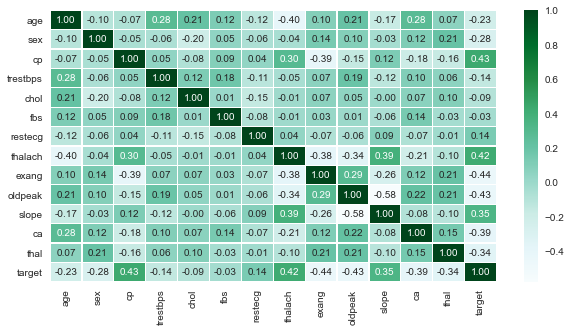

In [16]:
#Visualization correlation metrix.
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(),
            annot = True,
            linewidths = "0.2",
            fmt = "0.2f",
            cmap = "BuGn");

* In this correlation metrix:
    1. Higher the positive values represent the Higher the positive correlation.
    2. Higher the negative values represent the Higher the negative correlation.

# Model Selection

In [17]:
#Importing Libraries.
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#Importing Model selection and evaluation metrics.
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,precision_score,f1_score,recall_score,classification_report,plot_roc_curve

In [18]:
x = df.drop("target",axis = 1)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [19]:
y = df["target"]
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [20]:
#split data into train and split.
np.random.seed(42)
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2)

In [21]:
#Selecting Models.
models = {"logistic Regression" : LogisticRegression(solver = "liblinear"),
          "Random Forest" : RandomForestClassifier(n_estimators = 100),
          "KNN" : KNeighborsClassifier()}

models

{'logistic Regression': LogisticRegression(solver='liblinear'),
 'Random Forest': RandomForestClassifier(),
 'KNN': KNeighborsClassifier()}

In [22]:
#Here fit the train and test data inside model and finding score.
def fit_and_score(models,x_train,x_test,y_train,y_test):
    
    np.random.seed(42)
    
    model_scores = {}
    
    for name, model in models.items():
        
        model.fit(x_train,y_train)
        
        model_scores[name] = model.score(x_test,y_test)
        
    return model_scores        

In [23]:
#Having a look at which model is performing well for given dataset.
fit_and_score = fit_and_score(models = models,
              x_train = x_train,
              x_test = x_test,
              y_train = y_train,
              y_test = y_test)

fit_and_score

{'logistic Regression': 0.8688524590163934,
 'Random Forest': 0.8360655737704918,
 'KNN': 0.6885245901639344}

* As we can see logistic regression is performing pretty well on given dataset as compare to other models.

In [24]:
#fiting model score inside dataframe.
fit_and_score = pd.DataFrame(fit_and_score, index = ["Accuracy"])

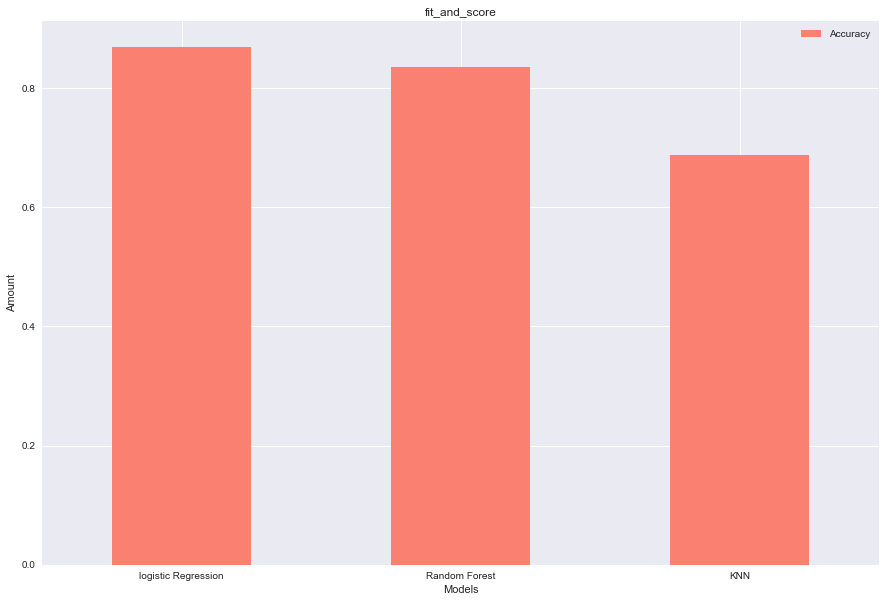

In [25]:
#Visualizing model score.
fit_and_score.T.plot(kind = "bar", figsize = (15,10), color = ["salmon"])
plt.title("fit_and_score")
plt.xlabel("Models")
plt.ylabel("Amount")
plt.xticks(rotation = 0);

## Hyperparameter Tuning using RandomizedSearchCV

we're going to tune:

* Randomforestclassifier()
* logisticRegression()

... using RandomizedSearchCV

In [26]:
#Creating Hyperparameter Grid for logistic Regression.
log_reg = {"C" : np.logspace(-4,4,20),
           "solver" : ["liblinear"]}

#Creating Hyperparameter Grid for Random Forest.
ran_forest = {"n_estimators" : np.arange(1,1000,50),
           "max_depth"    : [None,3,5,20],
           "min_samples_leaf" : np.arange(2,20,2),
           "min_samples_split" : np.arange(1,20,2)}

In [27]:
#Here we are doing Hyperparameter Tuning with the help of RandomizedSearchCV.
ran_cv_log = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg,
                                cv = 5,
                                n_iter = 100,
                                verbose = True)

In [28]:
#fiting train data inside tuned model.
ran_cv_log.fit(x_train,y_train)

D:\Users\Pranay\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 20 is smaller than n_iter=100. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [29]:
#Having look at score of tuned model.
ran_cv_log.score(x_test,y_test)

0.8852459016393442

## Hyperparameter Tuning using GridSearchCV

we're going to tune:

* Randomforestclassifier()
* logisticRegression()

... using GridSearchCV

In [30]:
# Creating grid Hyperparameter for LogisticRefression()
log_reg_gd = {"C" : np.logspace(-4,4,40),
               "solver" : ["liblinear"]}

# random seed
np.random.seed(42)

# setup the hyperparameter for logisticRegression()
gd_log_reg = GridSearchCV(LogisticRegression(),
                   param_grid = log_reg_gd,
                   cv = 5,
                   verbose = True)

# fit the tuned hyperparameter in logisticRegression
gd_log_reg.fit(x_train,y_train)

# Get the accuracy of tuned hyperparameter 
gd_log_reg.score(x_test,y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.1s finished


0.8852459016393442

# Model Prediction

In [31]:
#Making prediction with the help of tuned model and x test data.
y_pred = gd_log_reg.predict(x_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

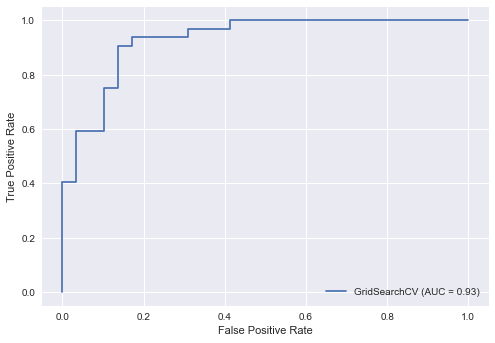

In [32]:
#Having a look at model performance.
plot_roc_curve = plot_roc_curve(gd_log_reg,x_test,y_test)
plot_roc_curve

* Graph seems like in top left corner means our model is preforming pretty well on test dataset. 

In [33]:
#Having look at confusion metrix.
print(confusion_matrix(y_test,y_pred))

[[25  4]
 [ 3 29]]


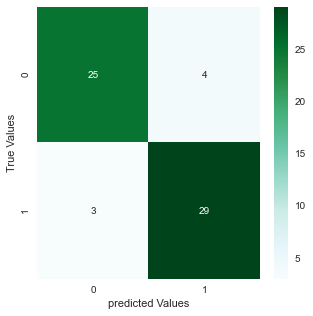

In [34]:
#visualizing the confusion metrix.
def plot_cof_met(y_test,y_pred):
    
    fig,ax = plt.subplots(figsize = (5,5))
    
    ax = sns.heatmap(confusion_matrix(y_test,y_pred),
                     annot = True,
                     cmap = "BuGn")
    
    plt.xlabel("predicted Values")
    plt.ylabel("True Values")
    
    
plot_cof_met(y_test,y_pred) 

In [35]:
#Having look at classification report.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



* As we see our model is giving us 89% of accuracy.

In [36]:
#Here we are finding the best parameter from gd_log_reg model.
gd_log_reg.best_params_

{'C': 0.19144819761699575, 'solver': 'liblinear'}

In [37]:
clf = LogisticRegression(C = 0.19144819761699575 ,
               solver = "liblinear")

clf.fit(x_train,y_train)

LogisticRegression(C=0.19144819761699575, solver='liblinear')

In [6]:
#Having a look at coefficient.
clf.coef_

NameError: name 'clf' is not defined

In [39]:
#Having look at which column contributed more in the prediction.
con_byu = dict(zip(df.columns,list(clf.coef_[0])))
con_byu

{'age': 0.0028951178529252252,
 'sex': -0.8373491162555057,
 'cp': 0.6535283357233712,
 'trestbps': -0.01156824049121622,
 'chol': -0.0016416591051159344,
 'fbs': 0.04176192859303602,
 'restecg': 0.3042370796052392,
 'thalach': 0.02451617153068425,
 'exang': -0.5898844416312659,
 'oldpeak': -0.5650317557297091,
 'slope': 0.4406332463322035,
 'ca': -0.6294745866935202,
 'thal': -0.667546272751108}

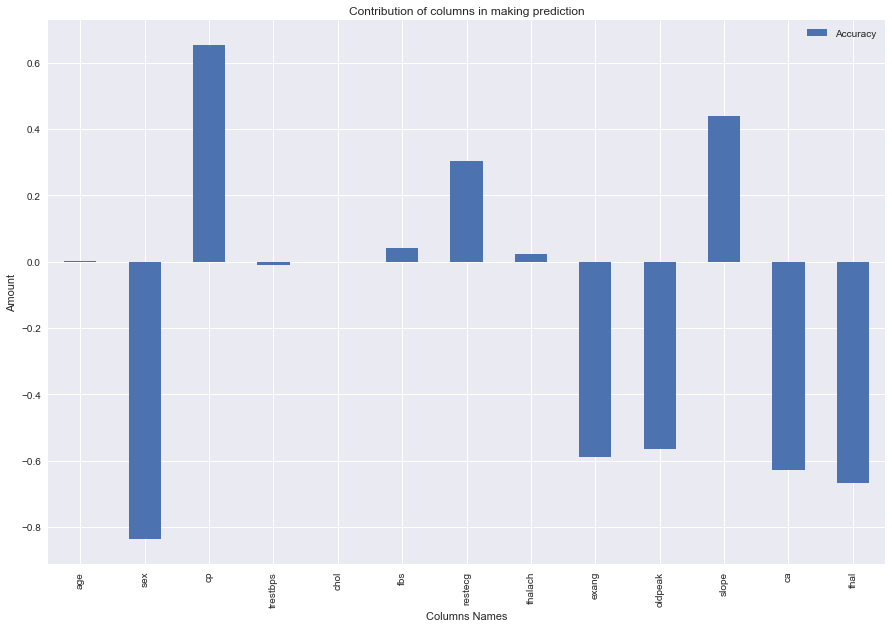

In [40]:
#Visualization.
con_byu = pd.DataFrame(con_byu , index = ["Accuracy"])
con_byu.T.plot(kind = "bar" , figsize = (15,10))
plt.title("Contribution of columns in making prediction")
plt.xlabel("Columns Names")
plt.ylabel("Amount");

* As we can see cp,slop,fbs and restecg is contributed more in prediction.
* Based on this, we can say that the person who have higher cp,slop or fbs. They have higher chances of having heart disease.